<a href="https://colab.research.google.com/github/roseleen-kaur/DataAnalytics_2022_Summer/blob/main/R_Kaur_QUIZ4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quiz 4#
Roseleen Kaur

##The Boston Home Mortgage Disclosure Act (HMDA)## 
This data set is based off of 1997-1998, in USA.

Goal
The goal of this data anlysis is to see whether a given mortgage 
application is likely to be denied or not; by construction and compare/contrasting a series of binary logistic regression models.

This data set includes the aatributes that might be needed to answer the goal. 

###Attributes in this Data Set are:###

DIR: debt payments to total income ratio

HIR: housing expenses to income ratio

LVR: 
ratio of size of loan to assessed value of property

CCS: 
consumer credit score from 1 to 6 (a low value being a good score)

MCS: 
mortgage credit score from 1 to 4 (a low value being a good score)

PCBR: 
public bad credit record ?

DMR: 
denied mortgage insurance ?

SELF: 
self employed ?

SINGLE: 
is the applicant single ?

URIA: 
1989 Massachusetts unemployment rate in the applicant's industry

CONDO: 
is unit a condominium ? 

BLACK: 
is the applicant black ?

DENY: 
mortgage application denied ?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import missingno as msno

from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/roseleen-kaur/DataAnalytics_2022_Summer/main/HDMA%20Boston%20Housing%20Data1.csv", 
                 names = ['DIR','HIR','LVR','CCS','MCS','PCBR','DMR','SELF','SINGLE','URIA','CONDO','BLACK','DENY'])
df

,DIR,HIR,LVR,CCS,MCS,PCBR,DMR,SELF,SINGLE,URIA,CONDO,BLACK,DENY
0,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
4,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


In [ ]:
#the shape of the data set
df.shape

(2381, 13)

In [ ]:
#description of the numerical data
df.describe()

,DIR,HIR,LVR,CCS,MCS,URIA,CONDO
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


In [ ]:
#getting info on each variable
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])

df_info['NUnique'] = df.nunique()
df_info['Missing Vals'] = df.isnull().sum()
df_info['Count'] = df.count()
df_info['Zeros'] = (df==0).sum()
df_info['?'] = (df=='?').sum()


df_info

,Dtype,NUnique,Missing Vals,Count,Zeros,?
DIR,float64,520,0,2381,1,0
HIR,float64,501,0,2381,3,0
LVR,float64,1538,0,2381,0,0
CCS,float64,7,0,2381,0,0
MCS,float64,5,0,2381,0,0
PCBR,object,2,1,2380,0,0
DMR,object,2,0,2381,0,0
SELF,object,2,1,2380,0,0
SINGLE,object,2,0,2381,0,0
URIA,float64,11,0,2381,0,0


The following description of the native data shows that there are 2 missing values, one in 'PCBR', and the other in 'SELF'.

There are no question marks in the data, nor are there any zeros that really affect the data. The zeros in 'CONDO' are for whether someone has a condo or not, represented in a binary 0(false) or 1(true). We can see 1695 people have condos. 

In [ ]:
num_features = []
cat_features =[]
#so we create 2 empty lists and depending on the data type
#they will go into one or the other.
for i in df.columns:
  if df[i].dtype == 'object':
    cat_features.append(i)
  else:
    num_features.append(i)
print(f'Numerical Features:\n {num_features}')
print(f'Categorical Features:\n {cat_features}')


Numerical Features:
 ['DIR', 'HIR', 'LVR', 'CCS', 'MCS', 'URIA', 'CONDO']
Categorical Features:
 ['PCBR', 'DMR', 'SELF', 'SINGLE', 'BLACK', 'DENY']


From the informaiton above we can see that
```
 ['PCBR', 'DMI', 'SELF', 'SINGLE', 'BLACK', 'DENY']
```
are all Categorical Data types and
```
 ['DIR', 'HIR', 'LVR', 'CCS', 'MCS', 'URIA', 'CONDO']
```
are Numerical Data Types

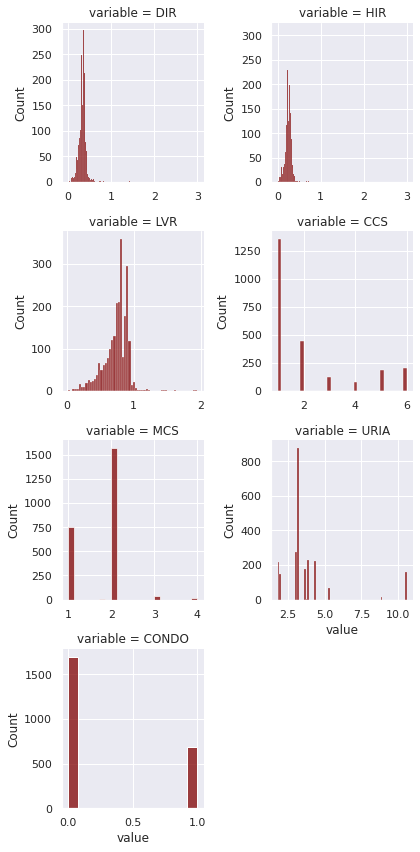

In [ ]:
#numerical data visuals
import warnings
warnings.filterwarnings("ignore")
num_data = pd.melt(df[num_features])
n1 = sns.FacetGrid (num_data, col = 'variable', col_wrap = 2, sharex = False, sharey = False)
n1 = n1.map(sns.histplot, 'value', color = 'maroon')

n1

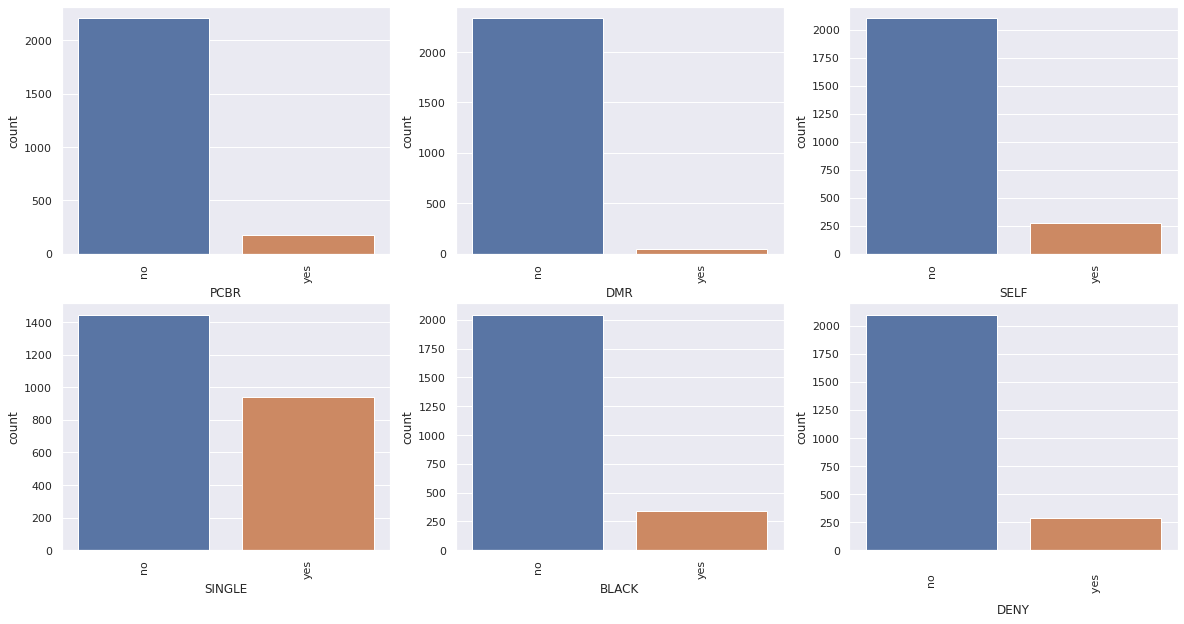

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
for variable, subplot in zip(cat_features, ax.flatten()):
  sns.countplot(df[variable], ax=subplot)
  for label in subplot.get_xticklabels():
    label.set_rotation(90)

Looking at these graphs we can see that if you not black, are not single, don't have public bad credit record, are not denied mortage insurance, aren't self employeed; you will not be denied a mortgage application.

Considering the fact that these graphs are from data has only been collected the USA from 1997-1998, you can see that the USA was still pretty rasict, and very conservstive. You had to be not black, married, and have a government job as a couple of needed factors to have some sort of guarentee that your mortgage application won't be denied. There is a very small number of people that aren't those things that have won't have their application denied. The 'yes' bar in the 'BLACK' and the 'yes' bar in 'DENY' are pretty proprotional, which leads me to beleive that what I said is correct.   

#Taking Care of Duplicated Data#

In [ ]:
df_copy = df.copy()

print(df_copy[df_copy.duplicated(subset=['DIR','HIR','LVR','CCS','MCS','PCBR','DMR','SELF','SINGLE','URIA', 'CONDO','BLACK','DENY'])])



         DIR     HIR       LVR  CCS  MCS PCBR DMR SELF SINGLE  URIA  CONDO  \
319   0.3397  0.1782  0.500000  2.0  1.0   no  no   no     no  10.6      0   
702   0.3600  0.3000  0.591054  1.0  1.0   no  no   no    yes   3.1      0   
1928  1.4200  1.1000  1.037500  1.0  1.0  yes  no  yes    yes   3.2      1   

     BLACK       DENY  
319     no    yes      
702     no    yes      
1928    no    yes      


The rows 319, 702 and 1928 are duplicated data rows. I will drop those. 

In [ ]:
df_copy1 = df_copy.drop_duplicates()
df_copy1

,DIR,HIR,LVR,CCS,MCS,PCBR,DMR,SELF,SINGLE,URIA,CONDO,BLACK,DENY
0,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
4,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


The rows are now gone.
![picture](https://drive.google.com/uc?id=1-J14D9JmQtwOu_Bh46DOT3o7HHq5i57I)
![picture](https://drive.google.com/uc?id=1APRrrSJrhjSqLhZfCTEaXDdXVGwdcJuA)
![picture](https://drive.google.com/uc?id=1yu7J3s-KF6rXnEDtG32nO1Qkfzb2tcVk)

In [ ]:
df_copy1.shape
#i did not reindex anything, so those indexes are now just not there

(2378, 13)

I also wanted to change the type of the CONDO column

In [ ]:
df_copy2 = df_copy1.copy()
df_copy2[['CONDO']] = df_copy2[['DENY']].astype('object')

pd.DataFrame(df_copy2.dtypes, columns=['Dtype'])

,Dtype
DIR,float64
HIR,float64
LVR,float64
CCS,float64
MCS,float64
PCBR,object
DMR,object
SELF,object
SINGLE,object
URIA,float64


In [ ]:
df_copy2

,DIR,HIR,LVR,CCS,MCS,PCBR,DMR,SELF,SINGLE,URIA,CONDO,BLACK,DENY
0,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,no,no,no
1,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,no,no,no
2,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,no,no,no
3,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,no,no,no
4,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,no,no,no
2377,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,no,no,no
2378,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,yes,yes,yes
2379,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,yes,no,yes


I turned CONDO into a categorical variable since it was also categoried in to 1:having a condo and 0:no condo.

###Quick Correlation Check###
Since I now want to fill in the two missing values, I thought checking the correlations for the data would be a good idea.

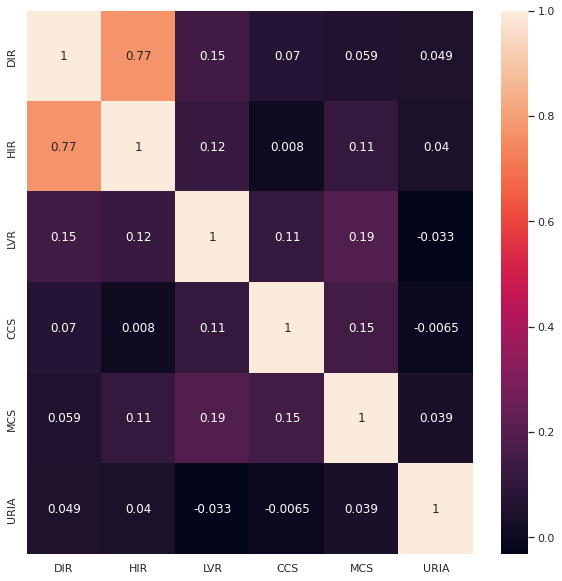

In [ ]:
#making a corr matrix with a heatmap
fig = plt.figure(figsize=(10,10))
corrmat = df_copy2.corr()

sns.heatmap(corrmat, annot=True)

fig.suptitle = ("HeatMap")

As we can see the two variables that have the most correlation are HIR(housing expenses to income ratio) and DIR(debt payments to total income ratio). The rest are pretty much not that dependent on each other. Especially CSS(consumer credit score from 1 to 6 (a low value being a good score)), and LVR(ratio of size of loan to assessed value of property) to URIA(1989 Massachusetts unemployment rate in the applicant's industry).

###Filling in Missing Data Values###



In [ ]:
miss = df_copy2.isnull().sum()
miss = miss[miss>0]
miss.sort_values(inplace = True)
miss

PCBR    1
SELF    1
dtype: int64

Text(0.5, 1.0, 'Missing')

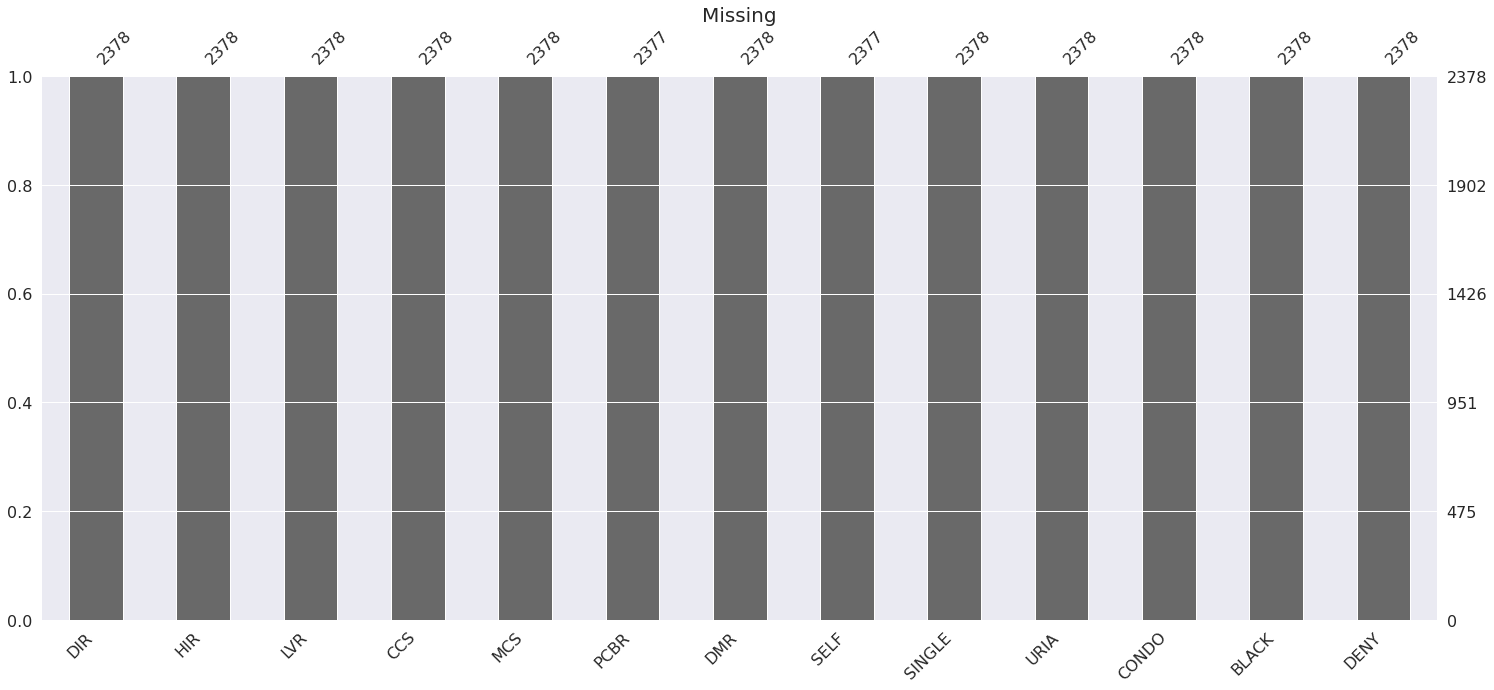

In [ ]:
msno.bar(df_copy2)
plt.title('Missing', fontsize = 20)

In [ ]:
df_copy2[df_copy2['PCBR'].isnull()]
 #so turns out the NaN are both on the same row.

,DIR,HIR,LVR,CCS,MCS,PCBR,DMR,SELF,SINGLE,URIA,CONDO,BLACK,DENY
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,no,no,no


PCBR and SELF are both yes, no columns.


In [ ]:
df_copy2['PCBR'].value_counts()

no     2203
yes     174
Name: PCBR, dtype: int64

According to this describe of the copy made after taking out the duplicates, all of numerical data values in that row are close to the mean, so I will according to that trend fill in the value of PCBR with the most frequent answer which is no. 

In [ ]:
df_copy2['PCBR'] = df_copy2['PCBR'].fillna('no')
df_copy2

,DIR,HIR,LVR,CCS,MCS,PCBR,DMR,SELF,SINGLE,URIA,CONDO,BLACK,DENY
0,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,no,no,no
1,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,no,no,no
2,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,no,no,no
3,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,no,no,no
4,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,no,no,no
2377,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,no,no,no
2378,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,yes,yes,yes
2379,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,yes,no,yes


In [ ]:
df_copy2['SELF'].value_counts()

no     2101
yes     276
Name: SELF, dtype: int64

In [ ]:
df_copy2['SELF'] = df_copy2['SELF'].fillna('no')
df_copy2

,DIR,HIR,LVR,CCS,MCS,PCBR,DMR,SELF,SINGLE,URIA,CONDO,BLACK,DENY
0,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,no,no,no
1,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,no,no,no
2,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,no,no,no
3,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,no,no,no
4,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,no,no,no
2377,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,no,no,no
2378,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,yes,yes,yes
2379,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,yes,no,yes


Now that the missing values and duplicates are gone, I wanted to do the graphs for the data again. Though I don't think much will have changed. So we will remake the arrays for numerical adn categorical data, since I changed CONDO, to do the rest. 

In [ ]:
num_features1 = []
cat_features1 =[]
#so we create 2 empty lists and depending on the data type
#they will go into one or the other.
for i in df.columns:
  if df_copy2[i].dtype == 'object':
    cat_features1.append(i)
  else:
    num_features1.append(i)
print(f'Numerical Features:\n {num_features1}')
print(f'Categorical Features:\n {cat_features1}')

Numerical Features:
 ['DIR', 'HIR', 'LVR', 'CCS', 'MCS', 'URIA']
Categorical Features:
 ['PCBR', 'DMR', 'SELF', 'SINGLE', 'CONDO', 'BLACK', 'DENY']


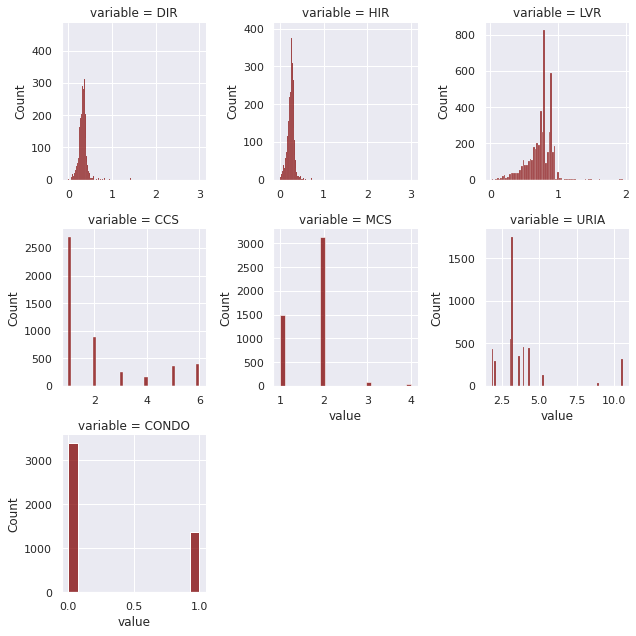

In [ ]:
#numerical data visuals
import warnings
warnings.filterwarnings("ignore")
num_data = pd.melt(df[num_features])
n1 = sns.FacetGrid (num_data, col = 'variable', col_wrap = 3, sharex = False, sharey = False)
n1 = n1.map(sns.histplot, 'value', color = 'maroon')
n1

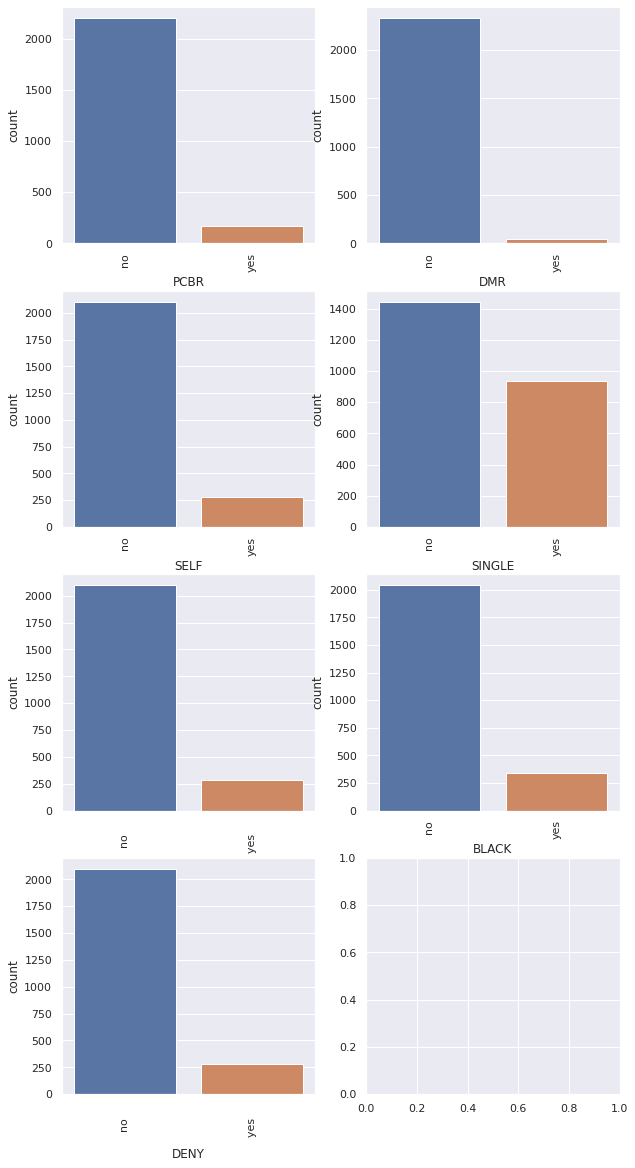

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(10,20))
for variable, subplot in zip(cat_features1, ax.flatten()):
  sns.countplot(df_copy2[variable], ax=subplot)
  for label in subplot.get_xticklabels():
    label.set_rotation(90)

###Looking at Outliers###


<function matplotlib.pyplot.show>

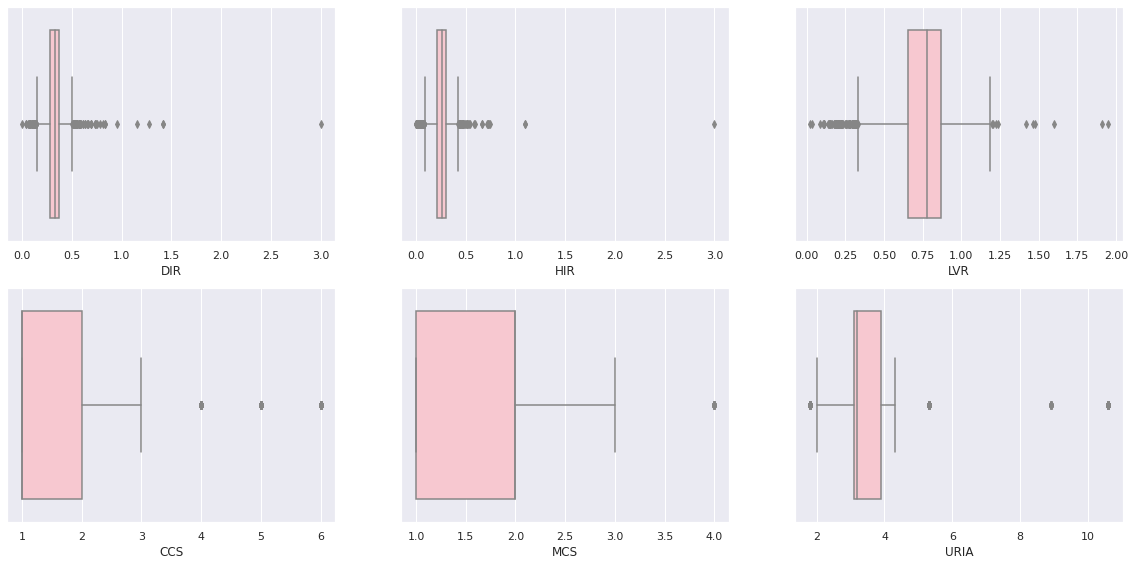

In [ ]:
#box plots to check any outliers
plt.figure(figsize=(20,25))

import warnings
warnings.filterwarnings("ignore")

j=1 
columns = df_copy2.columns.tolist() #makes lists of the cols 
for k in num_features1[0:]:
  plt.subplot(5,3,j)
  sns.boxplot(x=k, data = df, color= 'pink')
  j=j+1 #the way to map the plots in the output

plt.show

As I assess the box plots, I see that DIR, HIR,URIA, and LVR have quite a few outliers.


DIR OUTLIERS

In [ ]:
DIR_outliers = df_copy2[np.abs(df_copy2['DIR'] - df_copy2['DIR'].mean() ) > (2.5 * df_copy2['DIR'].std() )]
DIR_outliers

,DIR,HIR,LVR,CCS,MCS,PCBR,DMR,SELF,SINGLE,URIA,CONDO,BLACK,DENY
109,0.6100,0.3900,0.555556,1.0,2.0,no,no,no,no,10.6,yes,no,yes
195,0.7300,0.3700,0.456274,1.0,1.0,no,no,yes,yes,3.2,yes,no,yes
349,0.0000,0.2900,0.629496,1.0,1.0,no,no,no,no,3.1,no,no,no
411,0.9500,0.4400,0.547059,6.0,3.0,no,no,yes,no,10.6,no,no,no
459,0.6920,0.5360,0.789474,1.0,1.0,no,no,yes,no,3.2,no,no,no
474,0.0560,0.0530,0.800000,6.0,4.0,no,no,no,no,3.2,no,yes,no
559,0.6610,0.6610,0.433566,1.0,2.0,no,no,no,yes,2.0,no,no,no
571,0.8142,0.3933,0.516529,3.0,2.0,yes,no,no,yes,3.2,no,yes,no
607,0.7300,0.7100,0.606061,1.0,1.0,no,no,no,yes,3.9,no,no,no
620,1.1600,0.7400,0.752688,1.0,2.0,no,no,no,no,4.3,yes,no,yes


In [ ]:
DIR_outliers.shape
#So 27 rows out of the 13 columns are outliers in DIR column

(27, 13)

HIR OUTLIERS

In [ ]:
HIR_outliers = df_copy2[np.abs(df_copy2['HIR'] - df_copy2['HIR'].mean() ) > (2.5 * df_copy2['HIR'].std() )]
HIR_outliers

,DIR,HIR,LVR,CCS,MCS,PCBR,DMR,SELF,SINGLE,URIA,CONDO,BLACK,DENY
284,0.3600,0.01000,1.465116,1.0,2.0,no,no,yes,no,1.8,no,no,no
307,0.2779,0.00085,0.628571,1.0,2.0,no,no,no,no,3.2,no,no,no
323,0.5400,0.54000,0.750000,4.0,2.0,no,no,no,yes,3.2,no,no,no
459,0.6920,0.53600,0.789474,1.0,1.0,no,no,yes,no,3.2,no,no,no
559,0.6610,0.66100,0.433566,1.0,2.0,no,no,no,yes,2.0,no,no,no
607,0.7300,0.71000,0.606061,1.0,1.0,no,no,no,yes,3.9,no,no,no
608,0.5800,0.52000,0.800000,1.0,1.0,no,no,no,no,3.9,no,yes,no
620,1.1600,0.74000,0.752688,1.0,2.0,no,no,no,no,4.3,yes,no,yes
738,0.3950,0.00000,0.784314,5.0,1.0,no,no,yes,no,1.8,no,yes,no
788,0.5800,0.58000,0.819048,4.0,2.0,no,no,no,yes,3.2,no,yes,no


In [ ]:
HIR_outliers.shape

(23, 13)

LVR OUTLIERS

In [ ]:
LVR_outliers = df_copy2[np.abs(df_copy2['LVR'] - df_copy2['LVR'].mean() ) > (2.5 * df_copy2['LVR'].std() )]
LVR_outliers

,DIR,HIR,LVR,CCS,MCS,PCBR,DMR,SELF,SINGLE,URIA,CONDO,BLACK,DENY
10,0.2800,0.2700,0.223881,1.0,2.0,no,no,no,yes,3.1,no,no,no
42,0.3500,0.3400,1.478261,1.0,2.0,no,yes,no,no,3.2,yes,no,yes
54,0.3600,0.2600,0.207143,5.0,2.0,no,no,no,no,3.2,no,no,no
200,0.2403,0.2350,0.256410,1.0,2.0,no,no,no,yes,1.8,no,no,no
230,0.3400,0.2700,1.908333,1.0,2.0,no,no,no,yes,3.1,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,0.1600,0.1300,1.416000,5.0,2.0,yes,no,yes,yes,3.2,yes,no,yes
2000,0.1260,0.1240,0.272727,1.0,1.0,no,no,no,no,4.3,no,no,no
2020,0.1430,0.1190,0.086957,1.0,1.0,no,no,no,no,10.6,no,no,no
2163,0.3493,0.1948,1.200000,1.0,1.0,no,no,no,no,3.1,yes,no,yes


In [ ]:
LVR_outliers.shape

(67, 13)

URIA OUTLIERS

In [ ]:
URIA_outliers = df_copy2[np.abs(df_copy2['URIA'] - df_copy2['URIA'].mean() ) > (2.5 * df_copy2['URIA'].std() )]
URIA_outliers

,DIR,HIR,LVR,CCS,MCS,PCBR,DMR,SELF,SINGLE,URIA,CONDO,BLACK,DENY
13,0.3600,0.3400,0.649438,1.0,1.0,no,no,no,no,10.6,no,no,no
22,0.3200,0.3200,0.772059,1.0,2.0,no,no,no,yes,10.6,no,no,no
57,0.3320,0.2810,0.902439,2.0,2.0,no,no,no,yes,10.6,no,no,no
59,0.3990,0.2720,0.769231,1.0,2.0,no,no,no,yes,10.6,no,no,no
75,0.2180,0.0820,0.802198,2.0,1.0,no,no,yes,no,10.6,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0.3517,0.2561,0.897810,1.0,2.0,no,no,no,no,10.6,no,no,no
2209,0.2423,0.2315,0.902655,5.0,2.0,no,no,no,yes,10.6,yes,no,yes
2285,0.2100,0.0900,0.746667,1.0,2.0,no,no,no,yes,10.6,no,no,no
2334,0.3800,0.2700,0.855172,1.0,2.0,no,no,no,no,10.6,no,yes,no


In [ ]:
URIA_outliers.shape

(174, 13)

Looking at the information here we see that URIA has the most outliers, and HIR the least. 

<small> I wanted to take out some of the outliers in URIA but couldn't figure out how to <small>

##CHI SQUARE##

Since we are Using Deny as the attribute we are modelling this regression with.

In [267]:
df_copy3 = df_copy2.copy()

X = df_copy3.drop('DENY',1)
y = df_copy3['DENY']

X = X.apply((LabelEncoder().fit_transform))

print(X.head())

   DIR  HIR   LVR  CCS  MCS  PCBR  DMR  SELF  SINGLE  URIA  CONDO  BLACK
0   65  152  1005    5    2     0    0     0       0     6      0      0
1  116  253  1413    1    2     0    0     0       1     3      0      0
2  367  206  1408    0    2     0    0     0       0     3      0      0
3  235  209  1139    0    2     0    0     0       0     7      0      0
4  344  441   351    0    0     0    0     0       0     3      0      0


In [ ]:
test = SelectKBest(score_func = chi2, k=4)
fit = test.fit(X,y)
feature_score = pd.DataFrame()

In [268]:
for i in range(X.shape[1]):
  bruh = pd.DataFrame({'Features' : X.columns[i],'Score':fit.scores_[i]},index=[i])
  feature_score = pd.concat([feature_score, bruh])
feature_score
#I swear this was working before which is how I had the conclusions below
#now I just keep on getting this error
#too many indices for array: array is 0-dimensional, but 1 were indexed
#at line 3, I can't figure out what is going wrong
#these are the feature scores/

IndexError: ignored

Looking at the chi-square data above. The values for CONDO, DIR,HIR,LVR are very very high compared to the rest. "A very large [chi square](https://www.simplypsychology.org/chi-square.html) test statistic means that the sample data (observed values) does not fit the population data (expected values) very well. In other words, there isn't a relationship."

Basically the feature with a really high chi -square, don't really have much of a relationship to DENY. The one's that do are CCS, DMR, PCBR, BLACK, MCS, URIA, SINGLE, and SELF. Just as I had talked about earlier. 

###REGRESSION###

Through this regression I want to show that the DENY variable does depend on the categorical varibales more than it does on the numercial, as show above on the chi - square with for some reason now does not work. 

In [ ]:
df_copy3 = df_copy2.copy()

pd.get_dummies(df_copy3['DENY'])

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2376,1,0
2377,1,0
2378,0,1
2379,0,1


In [ ]:
dummies = pd.get_dummies(df_copy3['DENY'], prefix='DENY')
df_with_dummy = df_copy3[['DENY']].join(dummies)
df_with_dummy 

,DENY,DENY_ no,DENY_ yes
0,no,1,0
1,no,1,0
2,no,1,0
3,no,1,0
4,no,1,0
...,...,...,...
2376,no,1,0
2377,no,1,0
2378,yes,0,1
2379,yes,0,1
